In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from apyori import apriori

import datetime

import statsmodels.api as sm

from scipy.stats import spearmanr 

from sklearn.impute import SimpleImputer

from scipy.spatial.distance import cdist 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

import joblib
from sklearn.metrics import r2_score 

from math import radians, cos, sin, asin, sqrt

imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,19/10/2015,Evening,malay,male,moderate,28.0,yes,young,big,red,...,9.0,2.912316,101.657948,1.0,Clear,Monday,October,2015,0.912,Sepang
1,19/10/2015,Evening,malay,female,moderate,30.0,no,no_kids,big,blue,...,13.0,2.935533,101.737170,1.0,Clear,Monday,October,2015,0.817,Sepang
2,19/10/2015,Evening,indian,male,thin,51.0,no,no_kids,small,black,...,16.0,2.949924,101.637069,1.0,Clear,Monday,October,2015,0.653,Sepang
3,19/10/2015,Evening,indian,male,moderate,34.0,no,no_kids,big,blue,...,13.0,2.903530,101.661249,3.0,Clear,Monday,October,2015,0.912,Sepang
4,20/10/2015,Night,indian,male,thin,49.0,no,no_kids,big,blue,...,16.0,2.951176,101.746526,3.0,Clear,Tuesday,October,2015,0.845,Sepang


## Understanding the data

In [2]:
imp_df.dtypes

Date                  object
Time                  object
Race                  object
Gender                object
Body_Size             object
Age_Range            float64
With_Kids             object
Kids_Category         object
Basket_Size           object
Basket_colour         object
Attire                object
Shirt_Colour          object
shirt_type            object
Pants_Colour          object
pants_type            object
Wash_Item             object
Washer_No              int64
Dryer_No               int64
Spectacles            object
TimeSpent_minutes    float64
buyDrinks            float64
TotalSpent_RM        float64
latitude             float64
longitude            float64
Num_of_Baskets       float64
weather               object
Day                   object
Month                 object
Year                   int64
rwi                  float64
city                  object
dtype: object

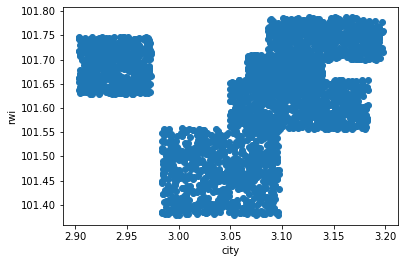

In [21]:
coordinate = plt.scatter(imp_df['latitude'],imp_df['longitude'])
plt.xlabel('city')
plt.ylabel('rwi')
coordinate.figure.savefig('city_rwi_scatter.png')
coordinate

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


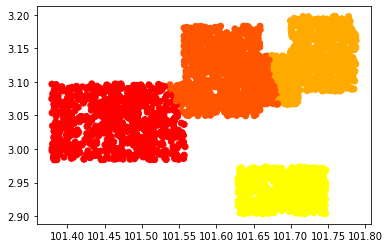

In [25]:
X = imp_df[['longitude', 'latitude']]

model = KMeans(n_clusters = 4, verbose=0)   #build the model
model.fit(X)
clusters = model.fit_predict(X)

df_clusters = imp_df.copy()
df_clusters['Clusters'] = clusters 
plt.scatter(df_clusters['longitude'],df_clusters['latitude'],c=df_clusters['Clusters'],cmap='autumn')

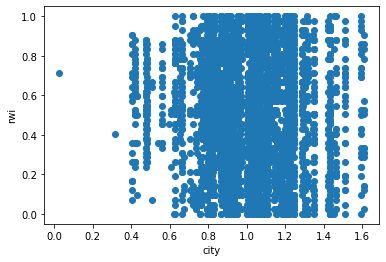

In [29]:
# min max scaler
scaler = MinMaxScaler()
scaler.fit(imp_df[['Age_Range']])
imp_df['Age_Range'] = scaler.transform(imp_df[['Age_Range']])
imp_df.head(5)

coordinate = plt.scatter(imp_df['rwi'],imp_df['Age_Range'])
plt.xlabel('city')
plt.ylabel('rwi')
coordinate.figure.savefig('city_rwi_scatter.png')
coordinate

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


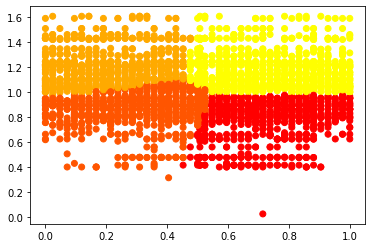

In [30]:
X = imp_df[['Age_Range', 'rwi']]

model = KMeans(n_clusters = 4, verbose=0)   #build the model
model.fit(X)
clusters = model.fit_predict(X)

df_clusters = imp_df.copy()
df_clusters['Clusters'] = clusters 
plt.scatter(df_clusters['Age_Range'],df_clusters['rwi'],c=df_clusters['Clusters'],cmap='autumn')